# SyriaTel Customer Churn Analysis

by: Armun Shakeri

# Overview

This project analyzes SyriaTel Customer Churn dataset to explore if there are any predictable patterns with 
cutomer turnover. 

# Business Problem

SyriaTel is interested in reducing the amount of money lost due to customer turnover. This project seeks to
analyze customer data and identify any patterns that lead to customer churn. 

# Data Understanding

We will begin analysis by importing all standard packages that are needed for this project. 

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
%matplotlib inline

Next we will import our data from SyriaTel and we will also display the information regarding the data. 

In [2]:
# Import data and display all columns
df = pd.read_csv("archive/bigml_59c28831336c6604c800002a.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

This data set contains many columns which can be dropped since they will not offer anything towards our main goal, and the data has many different data types which will be problematic for analysis. To begin the data cleaning process we will drop 3 columns, state, area code, and phone number since they do not offer any necessary information for analysis. 

In [3]:
# Dropped area code, state, and phone number 
# Display first 5 rows
df = df.drop(["state", "area code", "phone number"], axis=1)
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Drop all N/a values
df = df.dropna()

We will continue data exploration by plotting several categories against churn to see if there are any patterns that would lead to a customer leaving SyriaTel. 

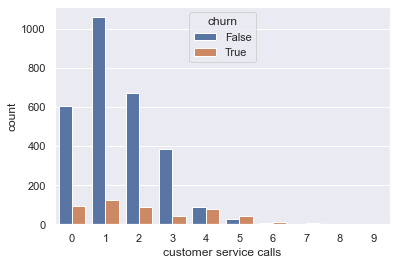

In [5]:
# Fig 1
# Use countplot to plot customer service calls against customer churn 
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="customer service calls", hue="churn", data=df)

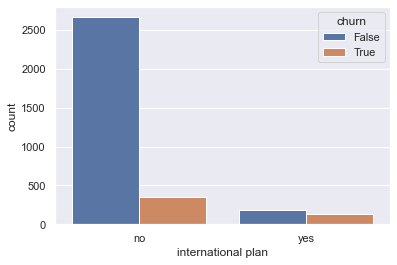

In [6]:
# Fig 2
# Use countplot to plot international/domestic plans against customer churn 
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="international plan", hue="churn", data=df)

# international clients have a higher chance of churn

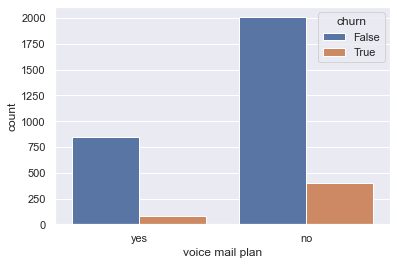

In [7]:
# Fig 3
# Plot states against customer churn
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="voice mail plan", hue="churn", data=df)

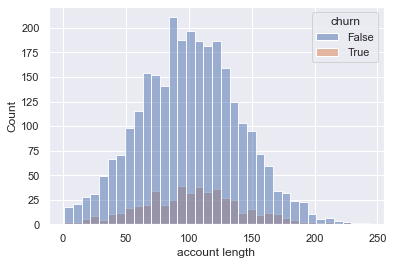

In [8]:
# Fig 4
# Use histplot to plot account length against customer churn 
sns.set_theme(style="darkgrid")
ax = sns.histplot(x="account length", hue="churn", data=df)

By plotting there are patterns observable, we will continue by building models next. To do so we need to prepare the data for modeling. We will begin by using onehotencoder to deal with categorical variables. For international plan and voicemail plan we will change "yes" to 1 and "no" to 0, then we will continue by changing churn data type to integer. 

In [9]:
# For categories with yes/no variables, make "yes" = 1 and "no" = 0
df['international plan'] = df['international plan'].apply(lambda x : 1 if "yes" else 0)
df['voice mail plan'] = df['voice mail plan'].apply(lambda x : 1 if "yes" else 0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [11]:
# change churn type to int
df['churn'] = df['churn'].astype(int)
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,1,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,1,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,1,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


The final step to begin modeling we will need to split our data into feature and target dataframes. We will set X as all variables except "churn" and we will set y to "churn". We will also scale the X variables for modeling. 

In [12]:
# Correlation matrix
corr = df.corr()
corr

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,NaN,NaN,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
international plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
voice mail plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number vmail messages,-0.004628,NaN,NaN,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,NaN,NaN,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,NaN,NaN,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,NaN,NaN,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,NaN,NaN,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,NaN,NaN,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,NaN,NaN,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786


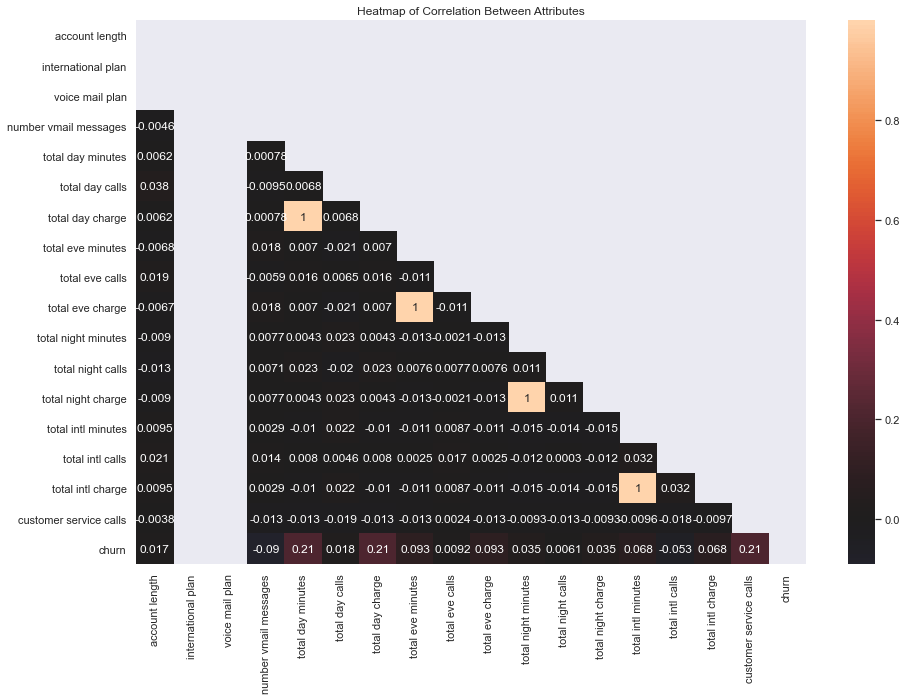

In [13]:
# Heatmap

fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr, 
            # Mask to show only half the values instead of showing duplicates
            mask=np.triu(np.ones_like(corr, dtype=bool)),
            # Specifies that we want values not just colors
            annot = True,
            center=0);

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes");

In [14]:
# Separate data into feature and target DataFrames
X = df.drop('churn', axis = 1)
y = df['churn']

# Split data into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=1)
# Scale the data for modeling
call_scaler = StandardScaler()
X_train_sc = call_scaler.fit_transform(X_train)
X_test_sc = call_scaler.transform(X_test)

# x and y train used for unseen data in a short while, used in production to see which customers will or won't churn
# divide data into training and test set 
# want to test the data to see how it performs with unseen data
# need certain labels that we know the answer to (where test set comes in)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2499, 17), (834, 17), (2499,), (834,))

# Data Modeling

For modeling we will go with 3 models, logistic regression, DecisionTreeClassifier, and XGBClassifier. The steps for modeling will go as follows, build a model, model.predict(), print classification report and confusion matrix for model, and finally determine the fit of the model. 

In [16]:
# of first logistic regression model 
# print out accuracy, classification report for training set

# build model > model.predict() > print out classification report for training and test set > determine the fit
# repeat for two more modeling techniques, random forests and gradient boosting
# pick out best model and then do a grid search and/or confusion matrix on that model

### Logistic Regression Model #1

In [17]:
# Train a logistic regression model with the train data
churn_model = LogisticRegression(random_state=42)
churn_model.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

In [18]:
# View the amount of values
y_test.value_counts()

# there is a class imbalance with the first model

0    712
1    122
Name: churn, dtype: int64

In [19]:
# Generate predictions
y_hat_train = churn_model.predict(X_train_sc)
y_hat_test = churn_model.predict(X_test_sc)

#y_hat_train
#y_hat_test

In [20]:
# Calculate the precision, recall, accuracy, and f1 score
print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.5853658536585366
Testing Precision:  0.4782608695652174



Training Recall:  0.1329639889196676
Testing Recall:  0.09016393442622951



Training Accuracy:  0.8611444577831132
Testing Accuracy:  0.8525179856115108



Training F1-Score:  0.21670428893905194
Testing F1-Score:  0.15172413793103448


In [21]:
print(classification_report(y_train, y_hat_train))

# focus on recall, why it's important

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2138
           1       0.59      0.13      0.22       361

    accuracy                           0.86      2499
   macro avg       0.73      0.56      0.57      2499
weighted avg       0.83      0.86      0.82      2499



The 1st linear regression model did not perform as well as we had expected. To fix this we will use the SMOTE to balance the data, by creating synthetic values to balance our existing data. 

In [22]:
# create new synthetic data using SMOTE to balance data
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_sc, y_train)
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

# fixed class imbalance

-----------------------------------------
Synthetic sample class distribution: 

1    2138
0    2138
Name: churn, dtype: int64


### Logistic Regression Model #2

In [23]:
# 2nd linear regression model
churn_model2 = LogisticRegression(random_state=42)
churn_model2.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [24]:
# Generate 2nd batch of predictions using resampled data 
y_hat_train2 = churn_model2.predict(X_train_resampled)
y_hat_test2 = churn_model2.predict(X_test_sc)

# y_hat_train2
# y_hat_test2


In [25]:
# print precision, recall, accuracy, and f1
print('Training Precision: ', precision_score(y_train_resampled, y_hat_train2))
print('Testing Precision: ', precision_score(y_test, y_hat_test2))
print('\n\n')

print('Training Recall: ', recall_score(y_train_resampled, y_hat_train2))
print('Testing Recall: ', recall_score(y_test, y_hat_test2))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_train_resampled, y_hat_train2))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test2))
print('\n\n')

print('Training F1-Score: ', f1_score(y_train_resampled, y_hat_train2))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test2))

Training Precision:  0.7188219052001841
Testing Precision:  0.2633333333333333



Training Recall:  0.7305893358278766
Testing Recall:  0.6475409836065574



Training Accuracy:  0.7224041159962582
Testing Accuracy:  0.6834532374100719



Training F1-Score:  0.7246578520064951
Testing F1-Score:  0.3744075829383886


In [26]:
# classification report for train data
print(classification_report(y_train_resampled, y_hat_train2))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      2138
           1       0.72      0.73      0.72      2138

    accuracy                           0.72      4276
   macro avg       0.72      0.72      0.72      4276
weighted avg       0.72      0.72      0.72      4276



In [27]:
# classification report for test data
print(classification_report(y_test, y_hat_test2))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       712
           1       0.26      0.65      0.37       122

    accuracy                           0.68       834
   macro avg       0.59      0.67      0.58       834
weighted avg       0.82      0.68      0.73       834



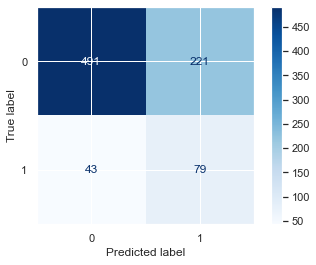

In [28]:
# confusion matrix for 2nd linear regression model
plot_confusion_matrix(churn_model2, X_test_sc, y_test, 
                    cmap=plt.cm.Blues)

plt.show()


# there is a lot more True Positives than all the other 
# From most to least = True Positive > False Negative > True Negative > False Positive

# True Positives (TP): The model predicted positive and the actual label is positive
# True Negative (TN): The model predicted negative and the actual label is negative
# False Positive (FP): The model predicted positive and the actual label was negative
# False Negative (FN): The model predicted  negative and the actual label was positive

# Looks like the 2nd model is a good fit 

The 2nd linear regression model performed much better, and based on its scores is sufficient enough to use for analysis. We will continue onto our 2nd model, DecisionTreeClassifier.

### DecisionTreeClassifier #1

In [29]:
# grid search 

# Initiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy')

In [30]:
# Test set predictions
test_pred = tree_clf.predict(X_test_sc)
#pred

In [31]:
# Classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       712
           1       0.44      0.63      0.52       122

    accuracy                           0.83       834
   macro avg       0.69      0.75      0.71       834
weighted avg       0.86      0.83      0.84       834



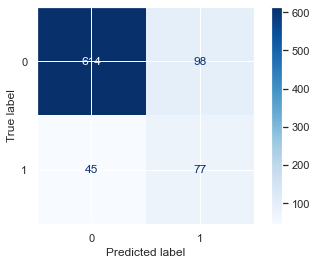

In [32]:
# confusion matrix for DecisionTreeClassifier
plot_confusion_matrix(tree_clf, X_test_sc, y_test, 
                    cmap=plt.cm.Blues)

plt.show()

### DecisionTreeClassifier #2

To improve scores we will determine the optimal tree depth and maximum feature size and apply that to the new model. 

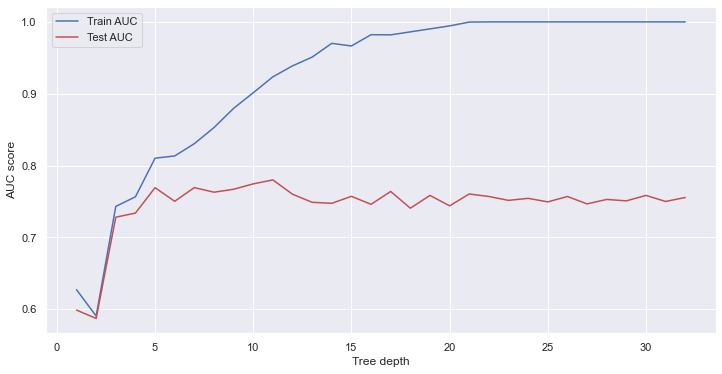

In [33]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
   dt.fit(X_train_sc, y_train)
   train_pred = dt.predict(X_train_sc)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test_sc)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

# the best depth for this specific tree is max_depth = 6

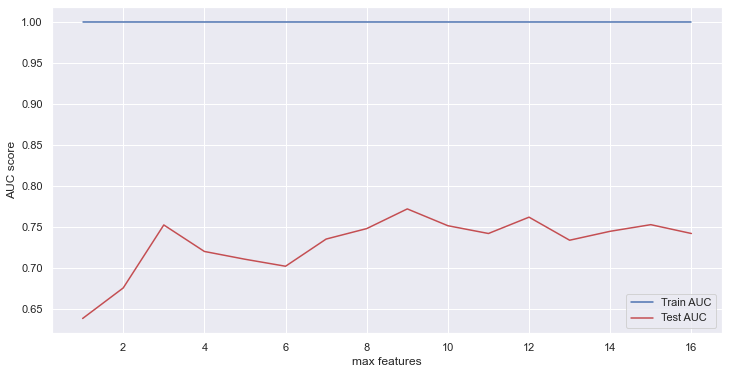

In [34]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

# max number of features will be set to 16

In [48]:
# Initiate and fit a DecisionTreeClassifier with updated max depth
tree_clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=16)
tree_clf2.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=16)

In [49]:
# Test set predictions updated max depth
test_pred2 = tree_clf2.predict(X_test_sc)

In [50]:
# Classification report
print(classification_report(y_test, test_pred2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       712
           1       0.65      0.62      0.64       122

    accuracy                           0.90       834
   macro avg       0.79      0.78      0.79       834
weighted avg       0.89      0.90      0.89       834



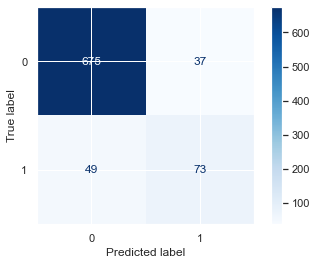

In [38]:
# confusion matrix for DecisionTreeClassifier
plot_confusion_matrix(tree_clf2, X_test_sc, y_test, 
                    cmap=plt.cm.Blues)

plt.show()

The DecisionTreeClassifier model performed much better than our logistic regression model. It scored higher in every metric and also displayed a high number, majority, of true positives in the confusion matrix. We will move onto our final model XGBClassifier. 

### XGBClassifier

In [39]:
# Initiate XGBClassifier 
XG = XGBClassifier()

# Fit XBGClassifier 
XG.fit(X_train_resampled, y_train_resampled)

# Predict on training and test sets
training_pred = XG.predict(X_train_resampled)
test_pred = XG.predict(X_test_sc)

# training_pred
# test_pred

In [40]:
# Classification report for test
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       723
           1       0.61      0.68      0.64       111

    accuracy                           0.90       834
   macro avg       0.78      0.81      0.79       834
weighted avg       0.90      0.90      0.90       834



In [41]:
# Classification report for training 
print(classification_report(training_pred, y_train_resampled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       1.00      1.00      1.00      2138

    accuracy                           1.00      4276
   macro avg       1.00      1.00      1.00      4276
weighted avg       1.00      1.00      1.00      4276



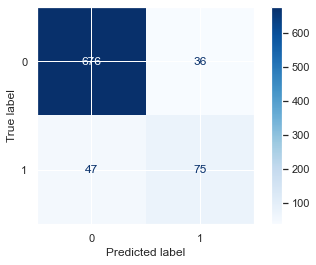

In [42]:
# confusion matrix for XGBClassifier
plot_confusion_matrix(XG, X_test_sc, y_test, 
                    cmap=plt.cm.Blues)

plt.show()

XGBClassifier showed the most promise among the other two models. It showed higher scores for the test data and also ran perfect scores on the training data. 

# Evaluation

After analyzing and evaluating the data set from Syria Tel we created 3 models the scores from highest to lowest go as follows:

1) XGBClassifier

2) DecisionTreeClassifier

3) LogisticRegression

For this analysis we will be choosing XGBClassifier as the chosen model. On the classification report it scored perfectly on the training data and had the highest scores in precision, recall, and f1-score. We want to ensure the model runs as accurateltly as possible, meaning we also want the chosen model to have low false positives and true negatives. The XGBClassifier also falls within this category. 

# Conclusion

Recommendations:

1) Bring down costs of day charges

2) offer bonuses for minutes used 

2) Implement more training focused on customer service

Upon complete analysis of models and heatmap, customer service calls, day charges, and day minutes were the highest correlated with customer churn. If SyriaTel focus' its efforts into the any (or all) of the recommendations above they will see less customer churn. 